# recommendation system

<div dir=rtl style="text-align: left">
هدف: 
</div>


In [196]:
# =====================
# import libraries
# =====================

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder  
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from keras import layers, models
import tensorflow as tf
from tensorflow import keras
import numpy as np


# from tensorflow.keras import layers


In [197]:
# =====================
# load dataset
# =====================

df = pd.read_csv('u.data', sep='\t', names=['user_id', 'movie_id', 'rating', 'timestamp'])

In [198]:
# =====================
# print info
# =====================

print('first rows')
print(df.head())

print('shape')
print(df.shape)

print('columns')
df.dtypes

first rows
   user_id  movie_id  rating  timestamp
0      196       242       3  881250949
1      186       302       3  891717742
2       22       377       1  878887116
3      244        51       2  880606923
4      166       346       1  886397596
shape
(100000, 4)
columns


user_id      int64
movie_id     int64
rating       int64
timestamp    int64
dtype: object

In [199]:
# =====================
# preprocessing
# =====================

# Encoding user_id and movie_id to consecutive numbers (for Embedding)
user_encoder = LabelEncoder()
item_encoder = LabelEncoder()

df['user'] = user_encoder.fit_transform(df['user_id'])
df['item'] = item_encoder.fit_transform(df['movie_id'])
df['rating'] =  df['rating'] / 5.0

num_users = df['user'].nunique()
num_items = df['item'].nunique()

# Show the first few rows of the modified dataset
print(df.head())

   user_id  movie_id  rating  timestamp  user  item
0      196       242     0.6  881250949   195   241
1      186       302     0.6  891717742   185   301
2       22       377     0.2  878887116    21   376
3      244        51     0.4  880606923   243    50
4      166       346     0.2  886397596   165   345


In [200]:
# =====================
# Train-Test Split
# =====================

# 3. Splitting into train and test sets
train, test = train_test_split(df[['user', 'item', 'rating']], test_size=0.2, random_state=42)

# Print the size of the train and test datasets
print(f'Train size: {len(train)}, Test size: {len(test)}')


Train size: 80000, Test size: 20000


In [201]:
# =====================
# Generate Network
# =====================
from tensorflow.keras import regularizers


# Input layers
user_input = keras.Input(shape=(1,), name='user_input')
item_input = keras.Input(shape=(1,), name='item_input')

# Embedding layers
embedding_dim = 32

user_embedding = layers.Embedding(input_dim=num_users, output_dim=embedding_dim, name='user_embedding')(user_input)
item_embedding = layers.Embedding(input_dim=num_items, output_dim=embedding_dim, name='item_embedding')(item_input)

# Flatten the embeddings
user_vec = layers.Flatten()(user_embedding)
item_vec = layers.Flatten()(item_embedding)

# Concatenate user and item embeddings
concat = layers.Concatenate()([user_vec, item_vec])

# MLP layers (Multi-Layer Perceptron)
x = layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001))(concat)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

x = layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001))(concat)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.4)(x)

x = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)

x = layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)


# Output layer
output = layers.Dense(1, activation='linear', name='prediction')(x)

# Define the model
model = keras.Model(inputs=[user_input, item_input], outputs=output)

# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='mse', metrics=['mae'])

# Show model summary
model.summary()

Model: "functional_24"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ user_input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ item_input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ user_embedding      │ (None, 1, 32)     │     30,176 │ user_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ item_embedding      │ (None, 1, 32)     │     53,824 │ item_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_48          │ (None, 32)        │          0 │ user_embedding[0… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_49          │ (None, 32)        │          0 │ item_embedding[0… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_24      │ (None, 64)        │          0 │ flatten_48[0][0], │
│ (Concatenate)       │                   │            │ flatten_49[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_76 (Dense)    │ (None, 128)       │      8,320 │ concatenate_24[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_76[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_35          │ (None, 128)       │          0 │ batch_normalizat… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_77 (Dense)    │ (None, 64)        │      8,256 │ dropout_35[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ dense_77[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_36          │ (None, 64)        │          0 │ batch_normalizat… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_78 (Dense)    │ (None, 32)        │      2,080 │ dropout_36[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ prediction (Dense)  │ (None, 1)         │         33 │ dense_78[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 103,457 (404.13 KB)

 Trainable params: 103,073 (402.63 KB)

 Non-trainable params: 384 (1.50 KB)

In [202]:
# =====================
# Train Model
# =====================

# Prepare the data for training
train_user = train['user'].values
train_item = train['item'].values
train_rating = train['rating'].values

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    [train_user, train_item], 
    train_rating, 
    epochs=100,  # You can adjust the number of epochs
    batch_size=64,  # You can adjust the batch size
    validation_split=0.1,  # 10% of data for validation
    callbacks=[early_stop],
    verbose=1
)

# Print the training history
print("Training completed!")


Epoch 1/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 2.0716 - mae: 1.0848 - val_loss: 0.3843 - val_mae: 0.3332
Epoch 2/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.5288 - mae: 0.4504 - val_loss: 0.3187 - val_mae: 0.2712
Epoch 3/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.4013 - mae: 0.3561 - val_loss: 0.2795 - val_mae: 0.2310
Epoch 4/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.3359 - mae: 0.3014 - val_loss: 0.2554 - val_mae: 0.2099
Epoch 5/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2907 - mae: 0.2616 - val_loss: 0.2348 - val_mae: 0.1959
Epoch 6/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2563 - mae: 0.2331 - val_loss: 0.2169 - val_mae: 0.1890
Epoch 7/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2287 - mae: 0.2143 - val_loss: 0.1978 - val_mae: 0.1846
Epoch 8/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2034 - mae: 0.2010 - val_loss: 0.1773 - val_mae: 0.1819
Epoch 9/100
1125/1125 ━━━━━━━━━━

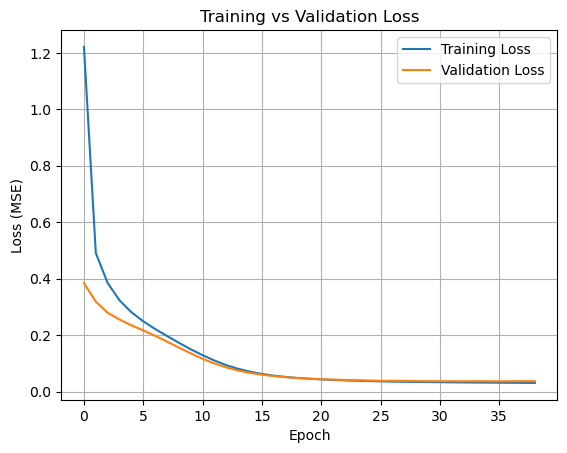

In [203]:
import matplotlib.pyplot as plt

# Draw training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [204]:
# 13. Prepare the data for testing
test_user = test['user'].values
test_item = test['item'].values
test_rating = test['rating'].values

# 14. Evaluate the model on test data
test_loss, test_mae = model.evaluate(
    [test_user, test_item], 
    test_rating, 
    verbose=1
)

# Denormalize loss and MAE
denorm_test_loss = test_loss * (5**2)  # چون MSE هست
denorm_test_mae = test_mae * 5         # چون MAE هست

print(f'Denormalized Test Loss (MSE): {denorm_test_loss}')
print(f'Denormalized Test MAE: {denorm_test_mae}')


# Denormalize predictions and true ratings
predictions = model.predict([test_user, test_item])
preds_denorm = predictions.flatten() * 5.0
true_denorm = test_rating * 5.0

# Calculate RMSE
rmse = np.sqrt(np.mean((preds_denorm - true_denorm) ** 2))
print(f'RMSE: {rmse:.4f}')

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 637us/step - loss: 0.0360 - mae: 0.1464
Denormalized Test Loss (MSE): 0.9091725572943687
Denormalized Test MAE: 0.7355819642543793
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step
RMSE: 0.9376


In [207]:
def recommend_top_n_for_users(model, df, user_ids, num_items, top_n=10):
    recommendations = {}

    for user_id in user_ids:
        # Encode external user ID to internal model ID
        internal_user_id = user_encoder.transform([user_id])[0]

        # Get items that the user has already rated
        seen_items = df[df['user'] == internal_user_id]['item'].values

        # Find items the user has not rated yet
        unseen_items = np.setdiff1d(np.arange(num_items), seen_items)

        # Create model input for unseen items
        user_input = np.full(shape=(len(unseen_items),), fill_value=internal_user_id)
        item_input = unseen_items

        # Predict ratings for unseen items
        preds = model.predict([user_input, item_input], verbose=0).flatten()

        # Get top-N indices with highest predicted scores
        top_indices = preds.argsort()[-top_n:][::-1]
        top_items_internal = unseen_items[top_indices]

        # Decode internal item IDs back to original movie IDs
        recommended_movie_ids = item_encoder.inverse_transform(top_items_internal)

        # Save recommendations
        recommendations[user_id] = recommended_movie_ids.tolist()

    return recommendations


In [208]:
# List of user IDs (from original dataset, not internal encoded ones)
user_ids = [1, 7, 12, 25, 87]

# Generate top-N recommendations
recs = recommend_top_n_for_users(model, df, user_ids, num_items, top_n=10)

# Print recommendations
for user, movies in recs.items():
    print(f"\n🎬 Recommendations for user {user}:")
    print("  ", movies)



🎬 Recommendations for user 1:
   [1629, 1449, 850, 1368, 1367, 1201, 1631, 1651, 1612, 1653]

🎬 Recommendations for user 7:
   [1629, 1449, 850, 1368, 963, 1612, 1201, 1367, 1651, 114]

🎬 Recommendations for user 12:
   [1629, 1449, 850, 1368, 64, 963, 1201, 1612, 1367, 1651]

🎬 Recommendations for user 25:
   [1629, 1368, 1449, 1389, 963, 850, 1612, 1639, 1651, 22]

🎬 Recommendations for user 87:
   [1629, 115, 1306, 1449, 313, 483, 1642, 850, 1293, 1612]
